# 手写卷积实现高斯滤波和拉普拉斯边缘检测

In [1]:
# 导入必要库
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
np.set_printoptions(suppress=True, threshold=np.nan)

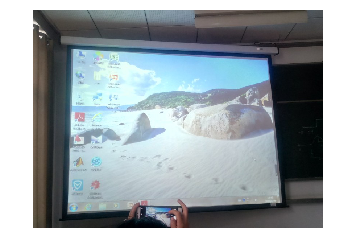

(601, 800, 3)


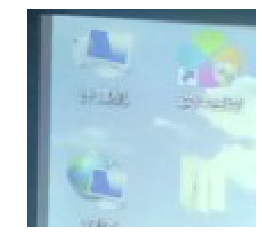

In [9]:
#img = cv2.imread('.\\data\\5.3.01.tiff',0)
img = cv2.imread('.\\data\\1.jpg')
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

width,height,chnnels = img.shape

plt.imshow(img)
plt.axis("off")#去除坐标轴
plt.show()

print(img.shape)

plt.imshow(img[105:200,100:200,:])
plt.axis("off")#去除坐标轴
plt.show()

In [3]:
pts1 = np.float32([[105,100],[650,135],[90,565],[685,535]])#第一个坐标为横向，第二个为纵向
pts2 = np.float32([[0,0],[800,0],[0,500],[800,500]])

M = cv2.getPerspectiveTransform(pts1,pts2)

#dst = cv2.warpPerspective(img,M,(800,500))

#plt.imshow(dst,cmap = 'gray')
#plt.axis("off")#去除坐标轴
#plt.show()

print(M)

[[   1.26001974    0.0406458  -136.36665287]
 [  -0.07553118    1.17612831 -109.68205765]
 [  -0.00025901    0.00021129    1.        ]]


In [4]:
print(M[1,2])

print(M[:,0])

print(M[1,:])

-109.68205765169644
[ 1.26001974 -0.07553118 -0.00025901]
[  -0.07553118    1.17612831 -109.68205765]


In [28]:
width_new = 400
height_new = 300
dst =  np.zeros((height_new,width_new,3),dtype = np.uint8)
i = 0
for i in range(width_new):
    for j in range(height_new):
        computingScaleTemp = (M[2,0]*(105+ i) + M[2,1]*(100 + j) + M[2,2])
        xScale = (M[0,0]*(105+ i) + M[0,1]*(100 + j) + M[0,2]) / computingScaleTemp
        yScale = (M[1,0]*(105+ i) + M[1,1]*(100 + j) + M[1,2]) / computingScaleTemp
        xInt = int(xScale)
        yInt = int(yScale)
        xFrac = xScale - xInt
        yFrac = yScale - yInt
        
        if(105 + xInt > 601):
            break
        if(100 + xInt > 601):
            break
        Sx1 = img[105 + xInt,100 + yInt,0] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt,0] * xFrac
        Sx2 = img[105 + xInt,100 + yInt + 1,0] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt + 1,0] * xFrac
        dst[i,j,0] = Sx1 * (1 - yFrac) + Sx2 * yFrac
        
        Sx1 = img[105 + xInt,100 + yInt,1] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt,1] * xFrac
        Sx2 = img[105 + xInt,100 + yInt + 1,1] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt + 1,1] * xFrac
        dst[i,j,1] = Sx1 * (1 - yFrac) + Sx2 * yFrac
        
        Sx1 = img[105 + xInt,100 + yInt,2] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt,2] * xFrac
        Sx2 = img[105 + xInt,100 + yInt + 1,2] * (1 - xFrac) + img[105 + xInt + 1,100 + yInt + 1,2] * xFrac
        dst[i,j,2] = Sx1 * (1 - yFrac) + Sx2 * yFrac
        
        
'''       Sx1 = img[xInt,yInt,0] * (1 - xFrac) + img[xInt + 1,yInt,0] * xFrac
        Sx2 = img[xInt,100 + yInt + 1,0] * (1 - xFrac) + img[xInt + 1,yInt + 1,0] * xFrac
        dst[i,j,0] = Sx1 * (1 - yFrac) + Sx2 * yFrac
        
        Sx1 = img[xInt,yInt,1] * (1 - xFrac) + img[xInt + 1,yInt,1] * xFrac
        Sx2 = img[xInt,yInt + 1,1] * (1 - xFrac) + img[xInt + 1,yInt + 1,1] * xFrac
        dst[i,j,1] = Sx1 * (1 - yFrac) + Sx2 * yFrac
        
        Sx1 = img[xInt,yInt,2] * (1 - xFrac) + img[xInt + 1,yInt,2] * xFrac
        Sx2 = img[xInt,yInt + 1,2] * (1 - xFrac) + img[xInt + 1,yInt + 1,2] * xFrac 
        
        dst[i,j,2] = Sx1 * (1 - yFrac) + Sx2 * yFrac     '''
        

IndexError: index 300 is out of bounds for axis 0 with size 300

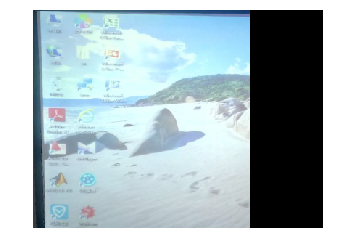

[[   1.26001974    0.0406458  -136.36665287]
 [  -0.07553118    1.17612831 -109.68205765]
 [  -0.00025901    0.00021129    1.        ]]


In [29]:
plt.imshow(dst,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()

print(M)

In [47]:
l = np.zeros(425)
r = np.zeros(425)

width,height = 800,425

for i in range(l.shape[0]):
    l[i] = int(-0.0235*i + 105)
for j in range(l.shape[0]):
    r[i] = int(-0.1059*i + 645)

In [52]:
tempLine = np.zeros((height,width))
for i in range(l.shape[0]):
    temp = r[i] - l[i]
    factor = temp / width 
    for j in range(width):
        tempLine[i][j] = img[i][int(j * factor)]
        

plt.imshow(tempLine,cmap = 'gray')
plt.axis("off")#去除坐标轴
plt.show()



IndexError: index 425 is out of bounds for axis 0 with size 425

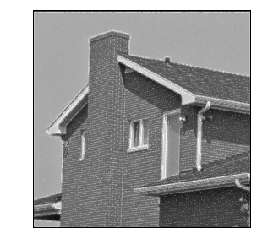

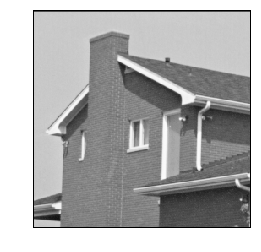

In [23]:
t = 0.5

dst = img_temp + t * img_lpls

plt.imshow(dst,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()  

plt.imshow(img_padding,cmap = "gray")
plt.axis("off")#去除坐标轴
plt.show()
